In [ ]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic


# Para tratar el problema de desbalance
# -----------------------------------------------------------------------
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek


# Modificar variables de entorno
# -----------------------------------------------------------------------
import sys
sys.path.append("..")

# Utilizar módulos de soporte
# -----------------------------------------------------------------------
import src.soporte_eda as se
import src.data_visualization_support as dvs

### 0. Import data

In [6]:
purchase_df = pd.read_csv("../datos/customer_purchase_data.csv", index_col=0)

### 0.1 Functions under construction

In [ ]:
def custom_properties(mapping):
    def properties(key):
        purchase_status = str(key[1])  # Extract PurchaseStatus from key
        return {"color": mapping.get(purchase_status, "gray")}  # Default to gray if not mapped
    return properties

def plot_relationships_categorical_target(df, target,hue=None, cat_type="count", num_type="hist",mapping={}):
    columns = purchase_df.drop(columns=target).columns.to_list()

    num_cols = 2
    num_rows = math.ceil(len(columns)/num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,num_rows*4))
    axes = axes.flat

    fig.suptitle("Difference in distrubtion by target class.", y=0.93)
    for ax, feature in zip(axes, columns):
        if df[feature].dtype in [int,float]:
            if num_type == "box":
                sns.boxplot(data=df,
                            x=target,
                            y=feature,
                            ax=ax,
                            hue=None)
            else:
                sns.histplot(data=df,
                                x=feature,
                                hue=target,
                                ax=ax)

        else:
            # mosaic plots
            if cat_type == "mosaic":
                mosaic(purchase_df, [feature,target], properties=custom_properties(mapping), ax=ax)
            else:
                sns.countplot(data=df,
                            x=target,
                            hue=feature,
                            ax=ax)

            
            ax.set_title(feature)

    if len(columns) % 2 != 0:
            fig.delaxes(ax=axes[-1])


    plt.subplots_adjust(hspace=0.6)
    plt.show()

# 1. Preliminary analysis and data cleaning

Let's start by exploring the dataframe:

In [7]:
se.exploracion_dataframe(purchase_df)

El número de datos es 1500 y el de columnas es 9

 ..................... 

Las primeras filas del dataframe son:


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,Female,66120.267939,8,Electronics,30.568601,No,5,Yes
1,20,Female,23579.773583,4,Home Goods,38.240097,No,5,No



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Age,int64
Gender,object
AnnualIncome,float64
NumberOfPurchases,int64
ProductCategory,object
TimeSpentOnWebsite,float64
LoyaltyProgram,object
DiscountsAvailed,int64
PurchaseStatus,object



 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 112

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna GENDER tiene 2 valores únicos, de los cuales los primeros son:


,count,pct
Gender,,
Female,757,50.5
Male,743,49.5


La columna PRODUCTCATEGORY tiene 5 valores únicos, de los cuales los primeros son:


,count,pct
ProductCategory,,
Clothing,331,22.1
Sports,321,21.4
Electronics,289,19.3
Beauty,286,19.1
Home Goods,273,18.2


La columna LOYALTYPROGRAM tiene 2 valores únicos, de los cuales los primeros son:


,count,pct
LoyaltyProgram,,
No,1010,67.3
Yes,490,32.7


La columna PURCHASESTATUS tiene 2 valores únicos, de los cuales los primeros son:


,count,pct
PurchaseStatus,,
No,852,56.8
Yes,648,43.2


**Data types**

Data types are correct for all columns.

**Duplicated**

There are 112 row duplicates across all columns.

In [8]:
purchase_df.drop_duplicates(keep="first", inplace=True)

**Missing values**

No missing values as NaN are found in the dataset. No missing values encoded as 'unknown' or any similar encoding are found in the categorial features. It would then be necessary to check numerical features ranges.

**Category representation**

All categories have enough representation.

**Erratum**
No erratums are found in categories.

Let's check numerical data ranges and descriptive statistics:

In [10]:
purchase_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1388.0,43.939481,15.487533,18.000000,30.750000,44.000000,57.000000,70.000000
AnnualIncome,1388.0,84699.045444,37541.136478,20001.512518,53766.895806,84625.292873,117188.207975,149785.176481
NumberOfPurchases,1388.0,10.548991,5.869383,0.000000,6.000000,11.000000,15.000000,20.000000
TimeSpentOnWebsite,1388.0,30.747545,16.976852,1.037023,16.379635,31.213146,44.666368,59.991105
DiscountsAvailed,1388.0,2.609510,1.699984,0.000000,1.000000,3.000000,4.000000,5.000000


- Age: presents a very ordinary and correct range.
- AnnualIncome: High variability, as expected for income features. No seemingly erronous values are inferred from this descriptive summary.
- NumberOfPurchases: Healthy range as well.
- TimeSpentOnWebsite: Healthy range as well.
- DiscountsAvailed: Healthy range as well.

**Conclusion**

Dataset looks clean.

# 2. EDA

To start, lets check the target feature's, PurchaseStatus, balance.

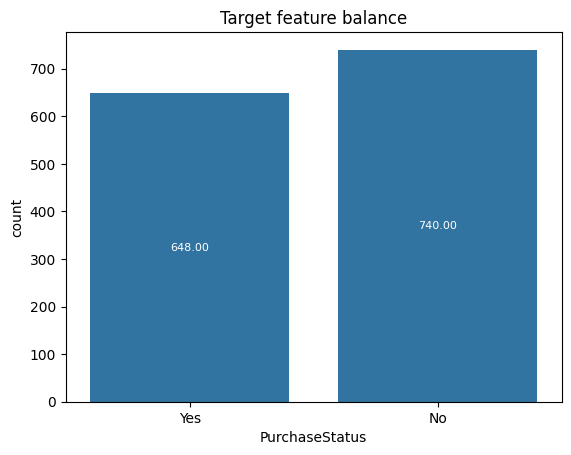

In [20]:
plt.title("Target feature balance")
ax = sns.countplot(data= purchase_df,
              x="PurchaseStatus")

dvs.plot_bar_labels(ax)
plt.show()

There's a slight imbalance in the classes of PurchaseStatus.

### 2.2 Categorical features

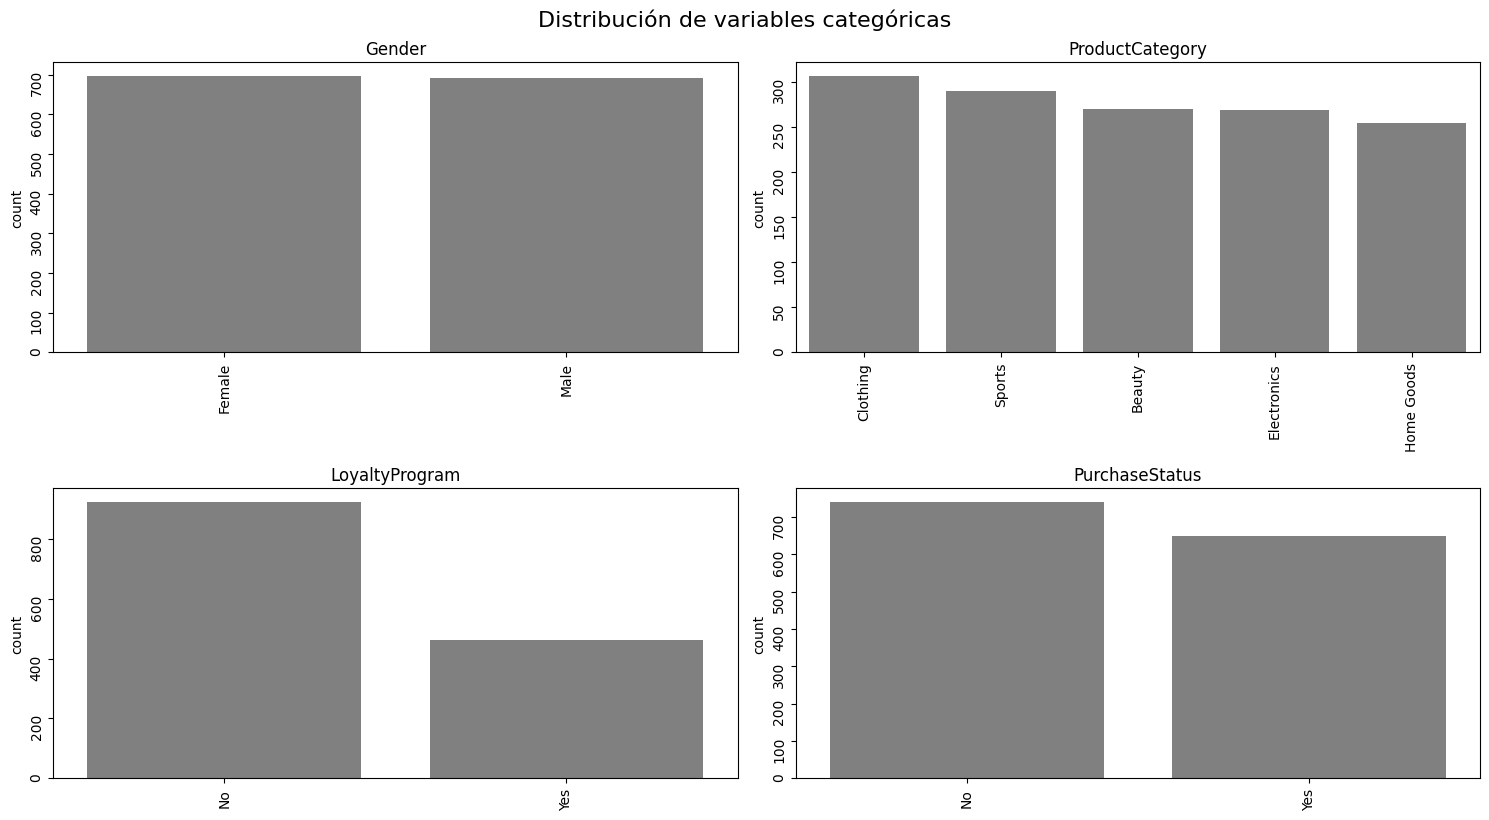

In [22]:
import src.soporte_preprocesamiento as sp

visualizador = sp.Visualizador(purchase_df)

visualizador.plot_categoricas(tamano_grafica=(15,8))

- Gender: is perfectly balanced.
- ProductCategory: Most frequent category is 'Clothing', less frequent is 'HomeGoods'. However, without knowing what rows reference to (number of purchases per client for that category, last item viewed, etc) it is hard to draw conclusions from this.
- Loyalty program: Most customers do not have a Loyalty program, which makes sense.

### 2.3 Numerical features

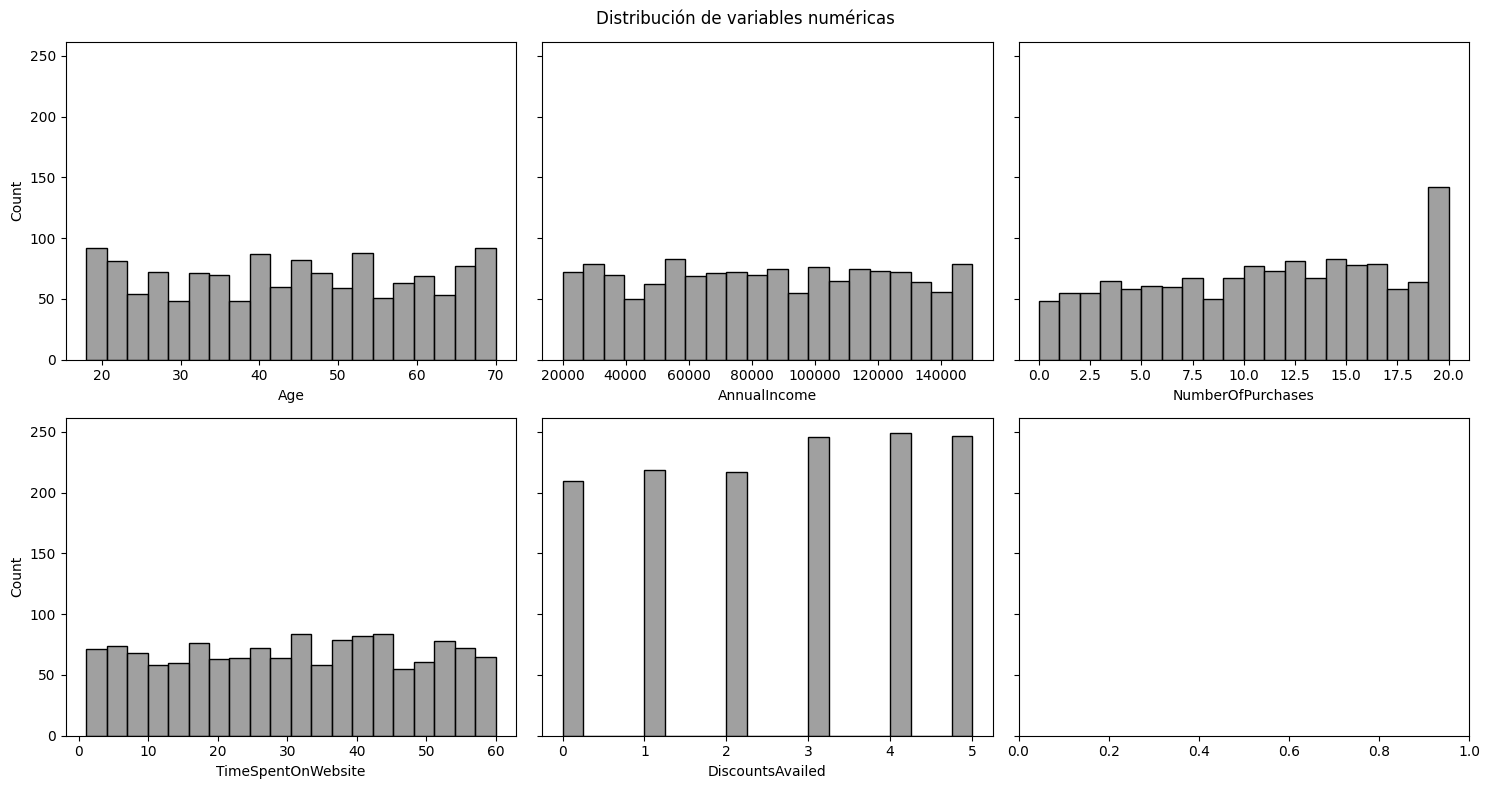

In [23]:
visualizador.plot_numericas(tamano_grafica=(15,8))

Almost all categories follow a distribution that is most similar to a uniform. It is very curious that Gender is perfectly balanced and so is Age, which is surprising because it does not point to any particular customer segment.

Similarly, a lack of anual income tendency is rare, because even if everyone bought in the store, we would find the distributions from the regions population for each feature.

Number of purchases is quite uniform, although there is a tendency for customers to count with more purchases than not. More concretely, the mode is at the maximum purchases ever, 20.

Time spent on the website is also oddly uniformly distributed.

Discounts availed shows a step up from 2 to 3 discounts.

## 2.2 Feature relationships

### 2.2.1 Target to numerical

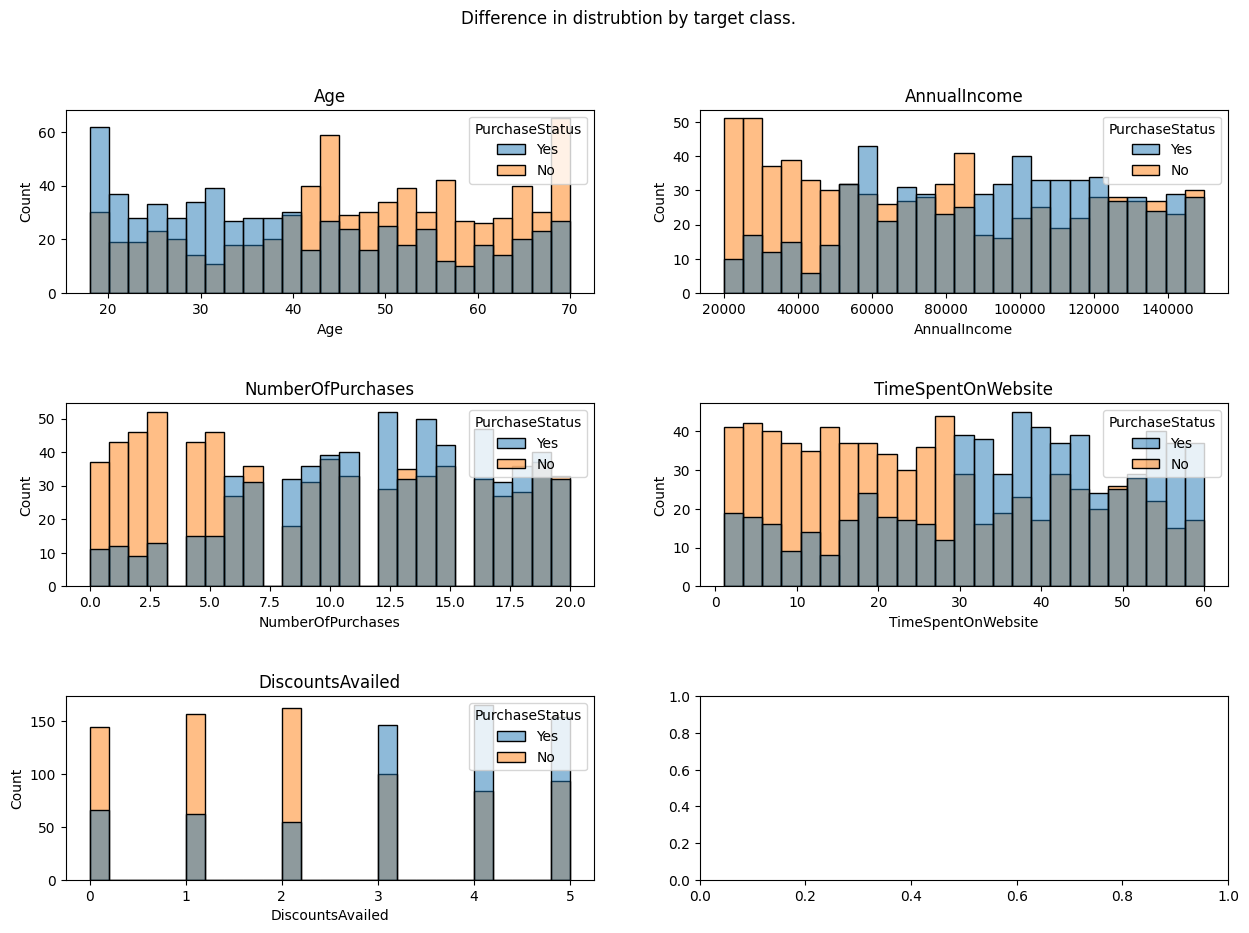

In [52]:
numerical_columns = purchase_df.select_dtypes(np.number).columns.to_list()

num_cols = 2
num_rows = math.ceil(len(numerical_columns)/num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,10))
axes = axes.flat

fig.suptitle("Difference in distrubtion by target class.")
for ax, feature in zip(axes, numerical_columns):
    sns.histplot(data=purchase_df,
                x=feature,
                hue="PurchaseStatus",
                ax=ax,
                bins=25)
    ax.set_title(feature)

plt.subplots_adjust(hspace=0.6)
plt.show()

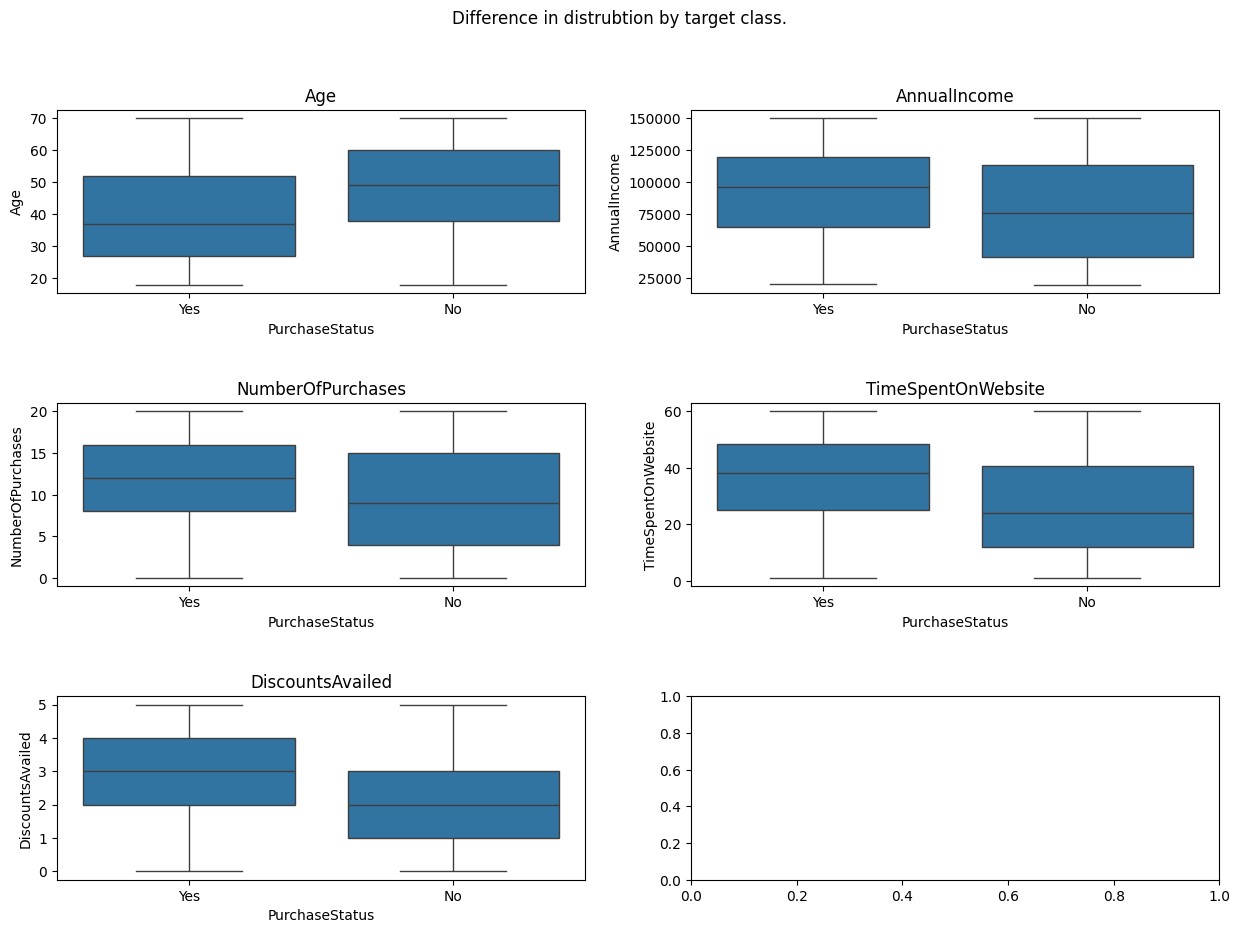

In [30]:
numerical_columns = purchase_df.select_dtypes(np.number).columns.to_list()

num_cols = 2
num_rows = math.ceil(len(numerical_columns)/num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,10))
axes = axes.flat

fig.suptitle("Difference in distrubtion by target class.")
for ax, feature in zip(axes, numerical_columns):
    sns.boxplot(data=purchase_df,
                x="PurchaseStatus",
                y=feature,
                ax=ax)
    ax.set_title(feature)

plt.subplots_adjust(hspace=0.6)
plt.show()

There are visual differences for the Age of customers that buy Vs.those that do not, where customers that buy tend to be younger. The opposite is true for their income, where customers that buy tend to have a higher income than those that do not.

A higher number of purchases seems like a better indicative for wether someone will buy or not, based on its distribution. Also, a highger time spent on the website is related to a higher probability to purchase. The same relationship is observed for discounts availed, where the more discounts enoyed the higher the tendency of purchase.

### 2.2.2 Target to categorical

Differences in target PurchaseStatus class for categories of Gender.


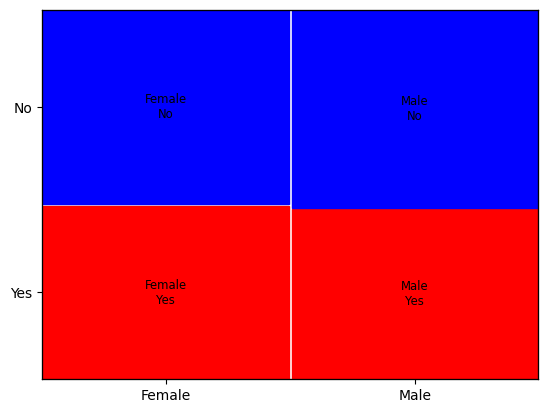

Differences in target PurchaseStatus class for categories of ProductCategory.


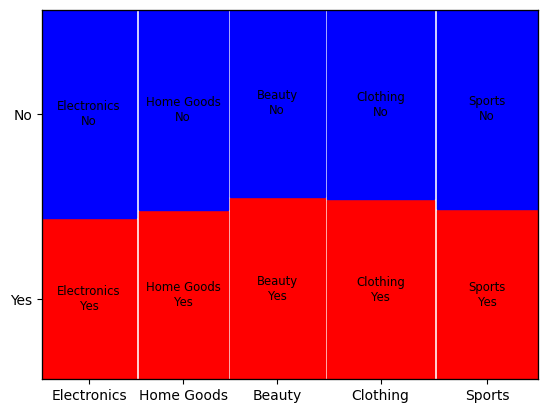

Differences in target PurchaseStatus class for categories of LoyaltyProgram.


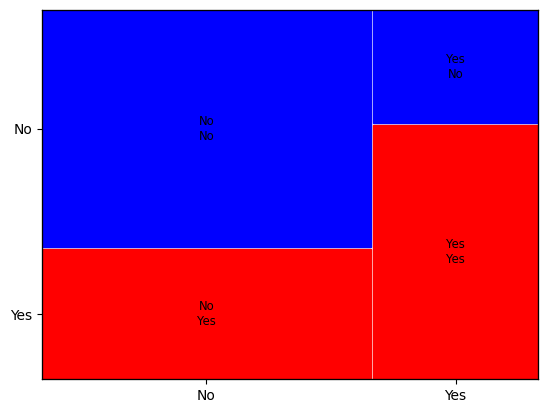

In [45]:
color_mapping = {
    "No": "blue",  
    "Yes": "red"    
}
for feature in purchase_df.select_dtypes(include=["O","category"]):
    if feature != "PurchaseStatus":
        print(f"Differences in target PurchaseStatus class for categories of {feature}.")
        mosaic(purchase_df, [feature,"PurchaseStatus"], properties=custom_properties(color_mapping))
        plt.show()

Men and women show very little visual differences in PurchaseStatus.

Beauty and clothing are the categories with more incidence of PurchaseStatus.

Customers that are members of the Loyalty Program have around 100% more chance to be positive in PurchaseStatus.

### 2.3 Predictors to predictors

### 2.3.1 Numerical features

Let's quickly inspect the relationship of numerical features among themselves:

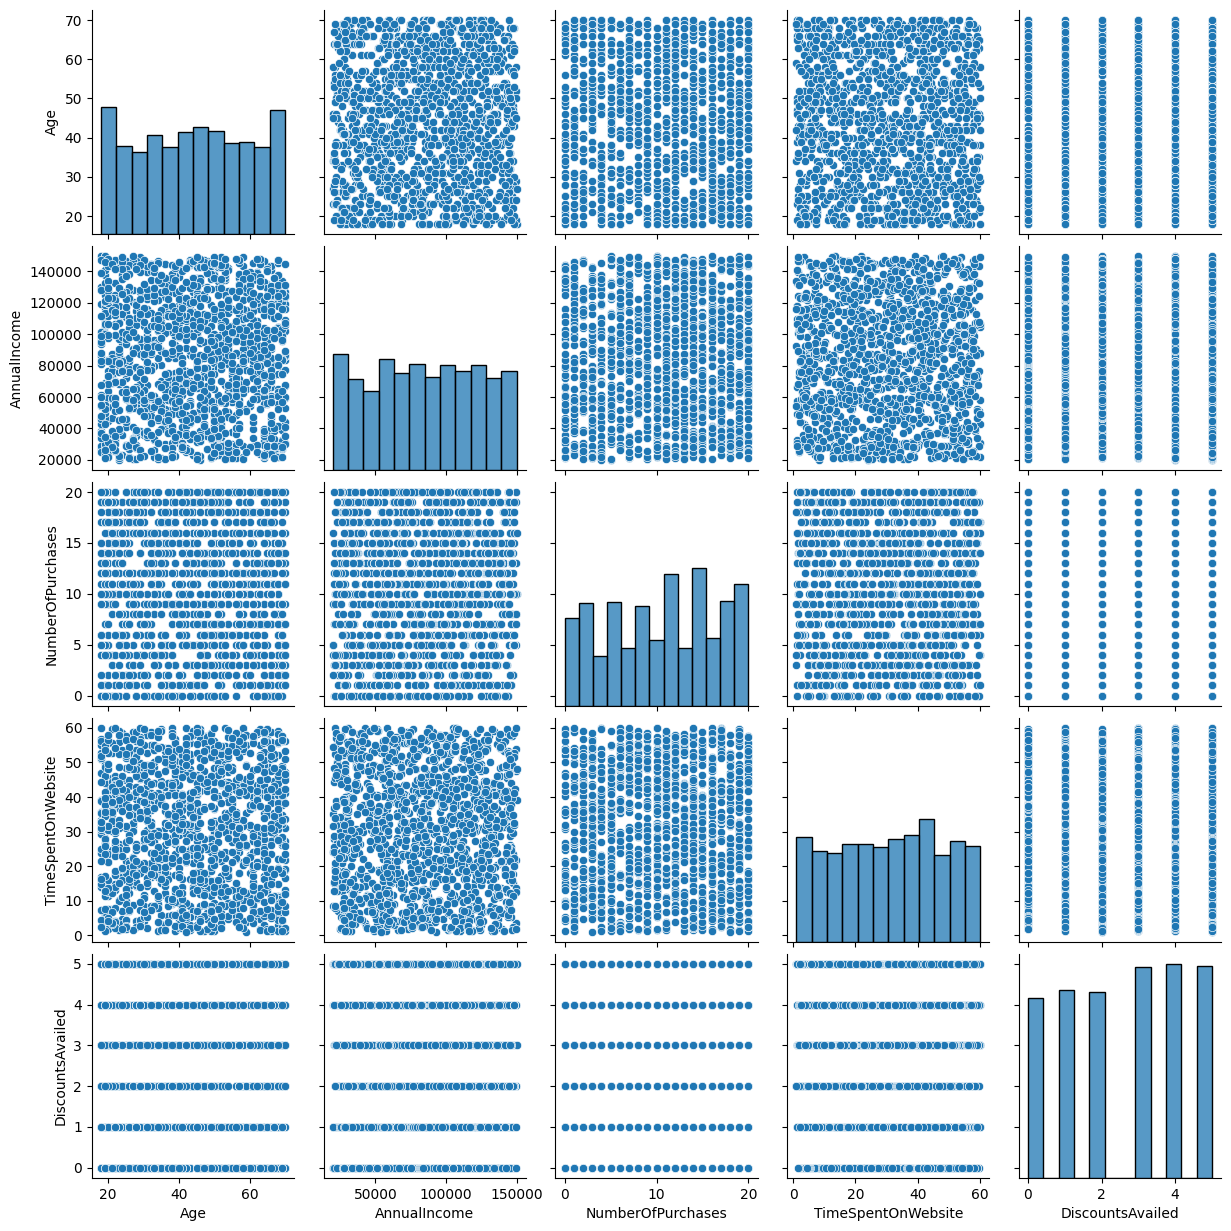

In [56]:
sns.pairplot(purchase_df)

No obvious relationship is perceived for Age and Annual Income with respect to the number of purchases, the time spent on the website or the discounts availed.

### 2.3.1 Gender

Let's quickly inspect the relationship of Gender with respect the numerical features:

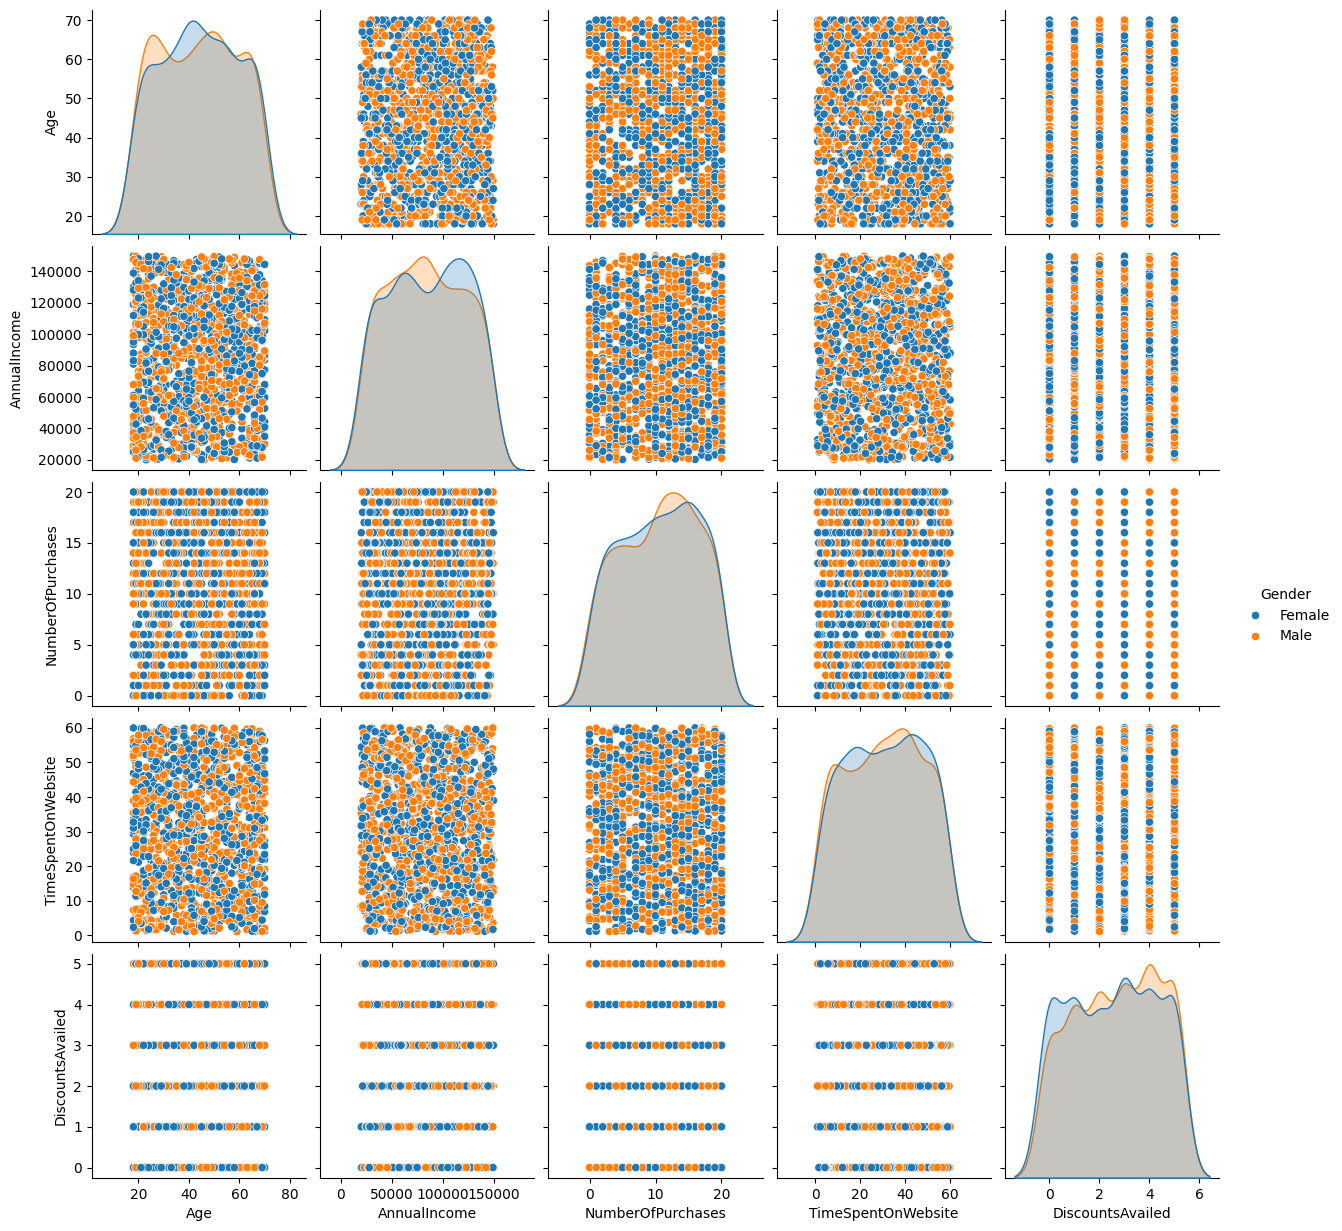

In [55]:
sns.pairplot(purchase_df, hue="Gender")

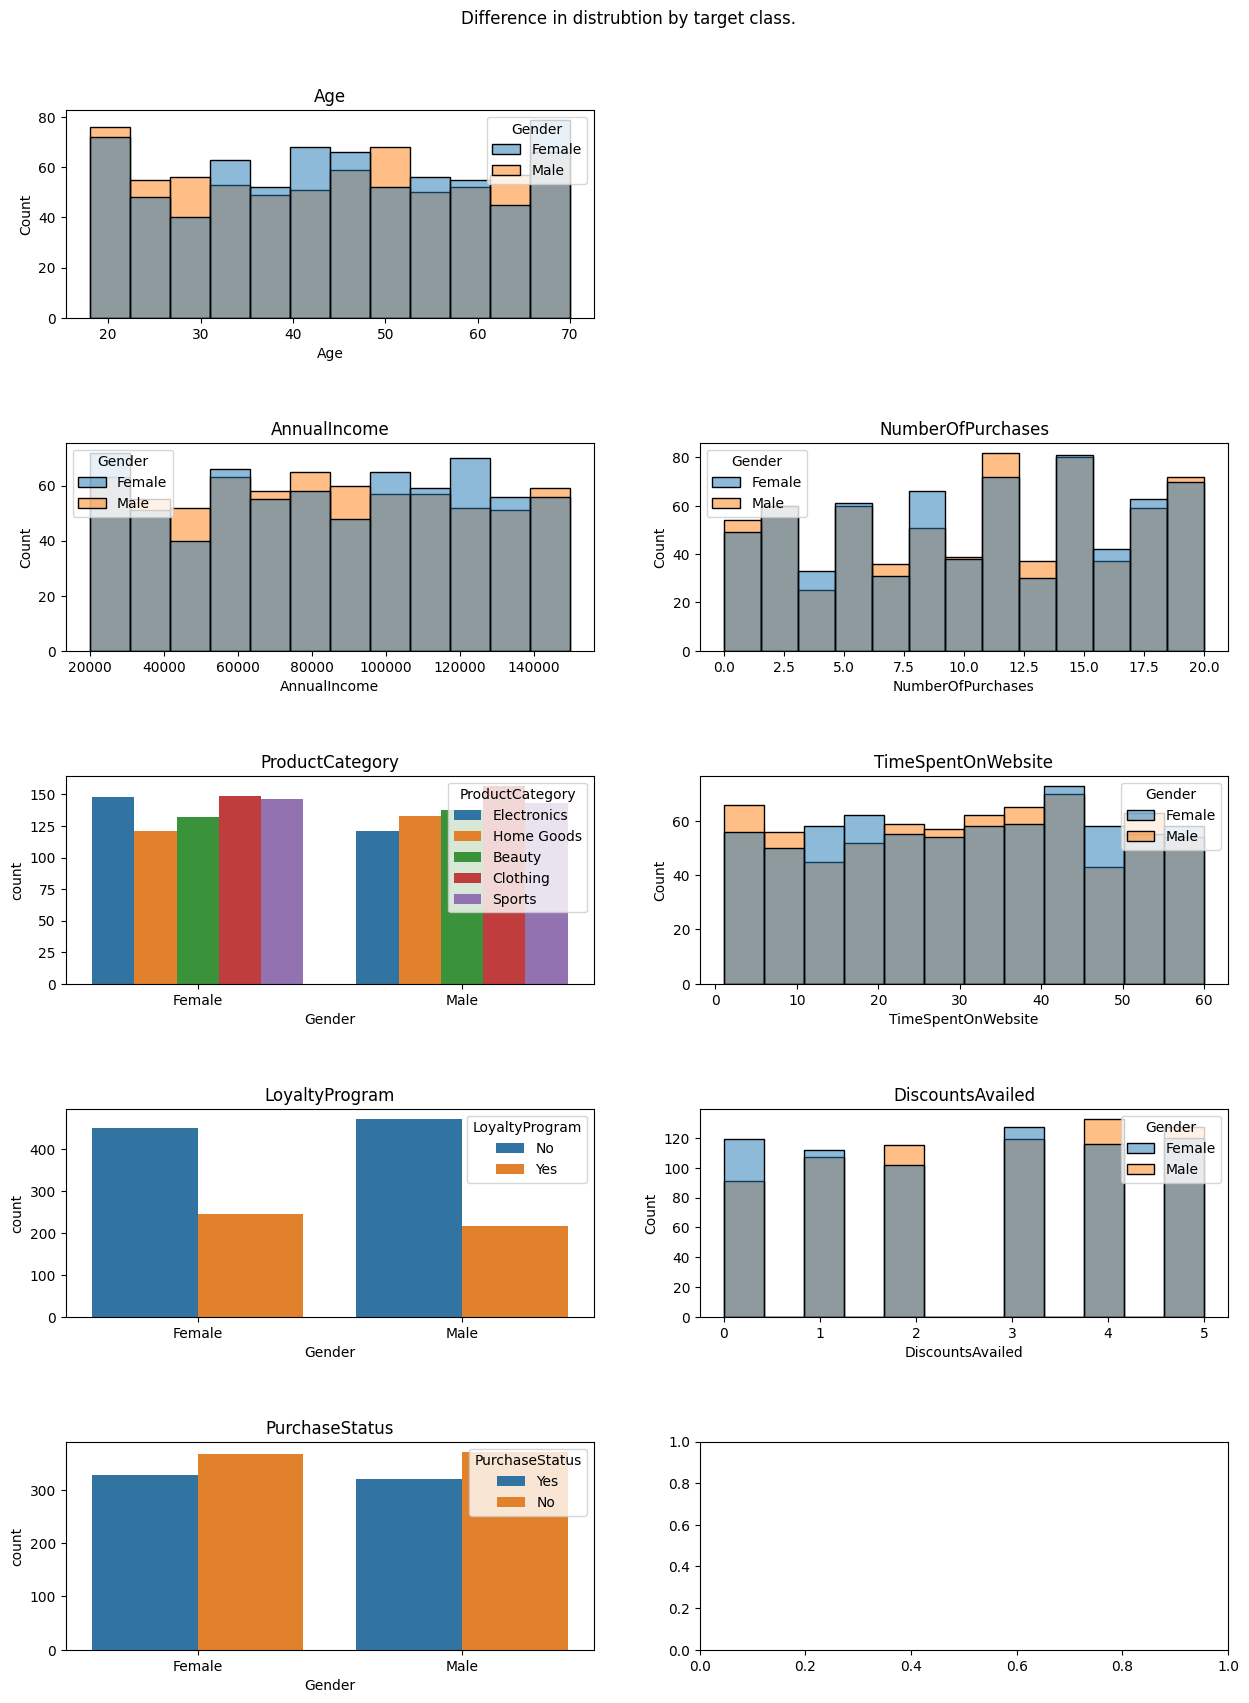

In [94]:
color_mapping = {
    "Male": "Blue",
    "Female": "Red"
}

plot_relationships_categorical_target(purchase_df, "Gender", cat_type="count", mapping=color_mapping)

# 3. Preprocessing options exploration

### 3.1 Missing values

In the premilinary analysis it was found that there were no outliers in the dataset. Therefore there is no need to handle them.

### 3.2 Outliers

### 3.3 Encoding

**